In [10]:
import pickle
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee'])
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["sans-serif"],
    "font.size":8}) 

In [11]:
with open('simul_results.pkl', 'rb') as f:
    results = pickle.load(f)

tmp = [0,0,0]
# tmp=[]
results['cost_first'] = tmp + results['cost_first']
results['performance_first'] = tmp + results['performance_first']
tmp = [0,0,0]
results['deepvm_noscale'] = tmp + results['deepvm_noscale']
results['deepvm'] = tmp + results['deepvm']

results['cost_first'] = results['cost_first'] / results['deepvm'][len(results['deepvm'])-1]
results['performance_first'] = results['performance_first'] / results['deepvm'][len(results['deepvm'])-1]
results['deepvm_noscale'] = results['deepvm_noscale'] / results['deepvm'][len(results['deepvm'])-1]
results['deepvm'] = results['deepvm'] / results['deepvm'][len(results['deepvm'])-1]

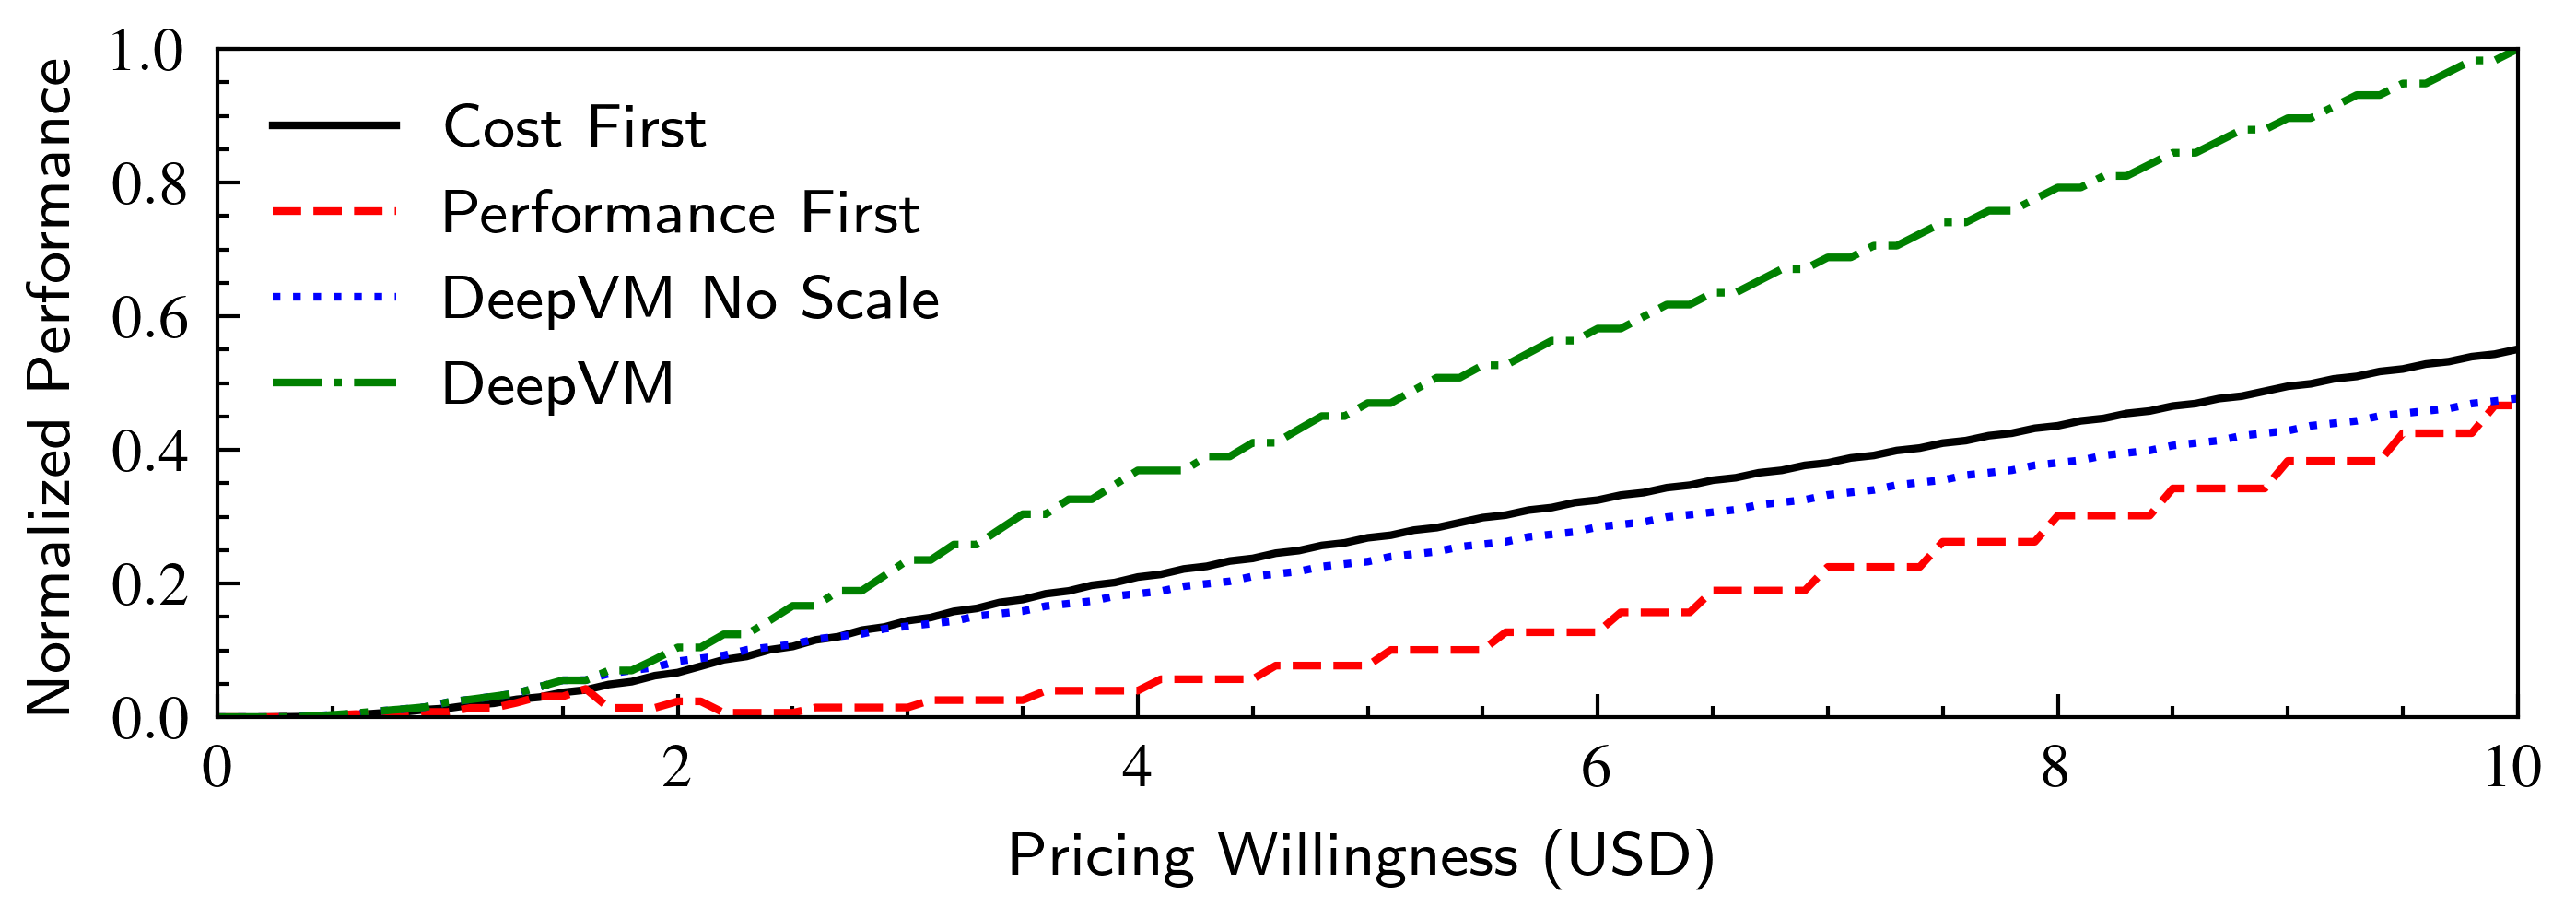

In [12]:
plt.figure(figsize=(4.8, 1.8))

plt.plot(results['pw'], results['cost_first'], label='Cost First')
plt.plot(results['pw'], results['performance_first'], label='Performance First')
plt.plot(results['pw'], results['deepvm_noscale'], label='DeepVM No Scale')
plt.plot(results['pw'], results['deepvm'], label='DeepVM')

plt.tick_params(axis='both', which='both', top=False, right=False)
plt.xlim([0,10])
plt.ylim([0,1])

# plt.title('Algorithm Performance Comparison')
plt.xlabel('Pricing Willingness (USD)')
plt.ylabel('Normalized Performance')
# plt.xscale('log', base=2)

plt.legend()
plt.tight_layout()
plt.savefig('simul_result.eps', format='eps')
plt.show()
